---
# $K$-Nearest Neighbors Algorithm
---
### I. Input the Library and Prepare the Data

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

sns.set_theme()


In [6]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/1. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,concave points_mean,concavity_mean,concave points_worst,compactness_mean,perimeter_worst,concavity_worst,radius_worst,perimeter_mean,area_worst,area_mean,fractal_dimension_mean
0,M,0.14710,0.3001,0.2654,0.27760,184.60,0.7119,25.38,122.80,2019.0,1001.0,0.07871
1,M,0.07017,0.0869,0.1860,0.07864,158.80,0.2416,24.99,132.90,1956.0,1326.0,0.05667
2,M,0.12790,0.1974,0.2430,0.15990,152.50,0.4504,23.57,130.00,1709.0,1203.0,0.05999
3,M,0.10520,0.2414,0.2575,0.28390,98.87,0.6869,14.91,77.58,567.7,386.1,0.09744
4,M,0.10430,0.1980,0.1625,0.13280,152.20,0.4000,22.54,135.10,1575.0,1297.0,0.05883


In [7]:
benign = df[df.diagnosis == 'B']
magligant = df[df.diagnosis == 'M']

Text(0.5, 1.0, 'Linearly Data')

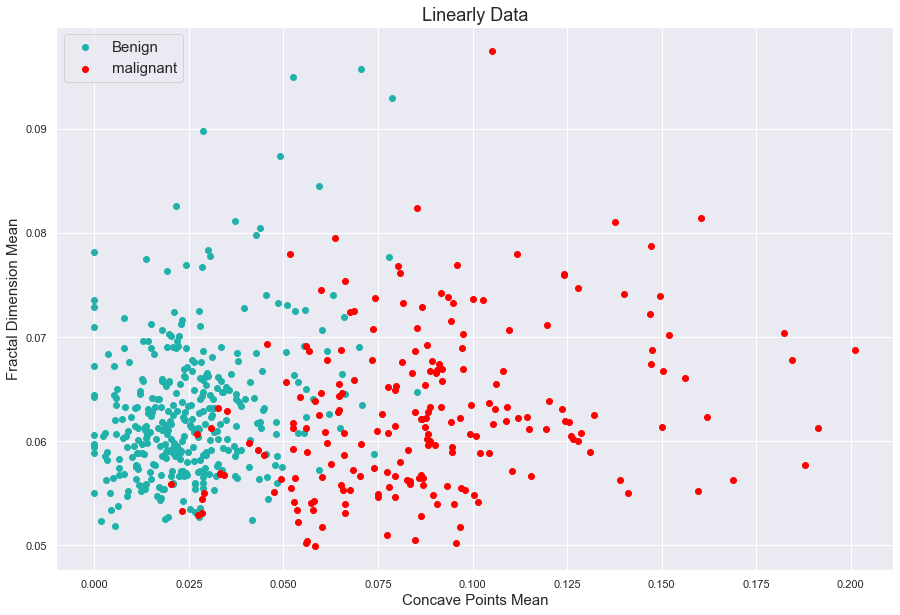

In [8]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

ax1.scatter(benign['concave points_mean'], 
            benign['fractal_dimension_mean'], 
            color = "lightseagreen", 
            label = "Benign")
ax1.scatter(magligant['concave points_mean'], 
            magligant['fractal_dimension_mean'], 
            color = "red", 
            label = "malignant")
ax1.set_xlabel("Concave Points Mean", fontsize = 15)
ax1.set_ylabel("Fractal Dimension Mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Data", fontsize = 18)

In [9]:
def make_labels(y):
    if y == "B":
        return 0
    else:
        return 1

X = df[["concave points_mean", "fractal_dimension_mean"]].to_numpy()
y = df['diagnosis'].map(make_labels).to_numpy()
# y = np.where(y == "B", -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [10]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

# print(f"The distance between point 10 and 67 is {distance(X[10], X[560])}")


### II. Build a function to calculate the $K$-Nearest Neighbors to train dataset
1. Build a function to of the KNN to train the dataset

In [11]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

2. After build a function to calculate the $KNN$, now we build a function to predict the target from the test dataset

In [12]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

3. To test how well the $KNN$ model work, we have to build a function to calculate the Calssification Error

In [13]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

4. To let $KNN$ Model work good, we need the choose the right value for $K$

In [14]:
possible_k = [k for k in range(2, 30, 1)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

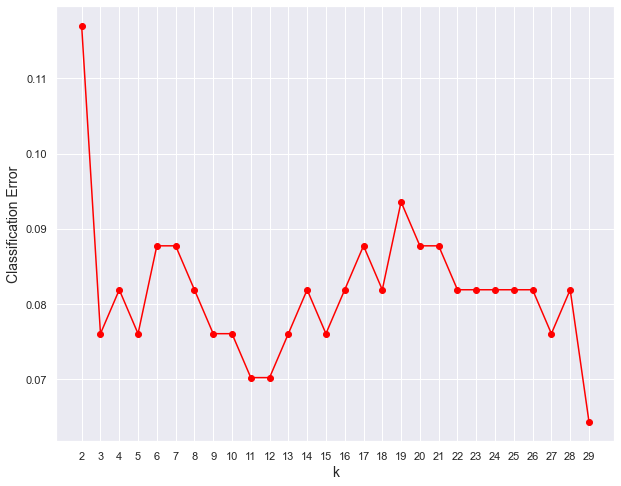

In [15]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

In [25]:
df_error = pd.DataFrame(list(zip(possible_k, errors)),
               columns =['possible_k', 'error'])

min_error = df_error['error'].min()
k = list(df_error.loc[df_error['error'] == min_error, 'possible_k'])
k = k[0]


In [17]:
k_nearest_neighbors(X_test[-1], X_train, y_train, k)

[[array([0.09561, 0.05024]), 1, 0.001853105501583764],
 [array([0.09498, 0.05395]), 1, 0.002766261014438085],
 [array([0.09791, 0.05533]), 1, 0.0037792194961393756],
 [array([0.09702, 0.05553]), 1, 0.003786211827143327],
 [array([0.1003 , 0.05484]), 1, 0.004760598701844124],
 [array([0.1015 , 0.05419]), 1, 0.005406829015236196],
 [array([0.09063, 0.05391]), 1, 0.00641124792844576],
 [array([0.09464, 0.05892]), 1, 0.007442210693066947],
 [array([0.1021 , 0.05884]), 1, 0.008922516461178424],
 [array([0.09934, 0.06071]), 1, 0.009339775157893254],
 [array([0.1009 , 0.06049]), 1, 0.009700814398801784],
 [array([0.08994, 0.05961]), 1, 0.010339990328815595],
 [array([0.1043 , 0.05883]), 1, 0.010402009421260874],
 [array([0.08691, 0.05581]), 1, 0.010566934276316858],
 [array([0.08683, 0.05649]), 1, 0.010917806556263945],
 [array([0.08591, 0.05647]), 1, 0.011745709855091777],
 [array([0.08824, 0.06069]), 1, 0.01228046416060892],
 [array([0.0917, 0.0633]), 1, 0.01256473238871405],
 [array([0.105

In [18]:
KNN_Predict(X_test[-1], X_train, y_train, k)

1

In [19]:
classification_error(X_test, y_test, X_train, y_train, k)

0.06432748538011696

---
## $K$ Nearest Neighbors Classifier - Scikit Learn

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

KNN_model = KNeighborsClassifier(n_neighbors = k)
KNN_model.fit(X_train, y_train)
predictions = KNN_model.predict(X_test)


In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.90      0.92      0.91        61

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



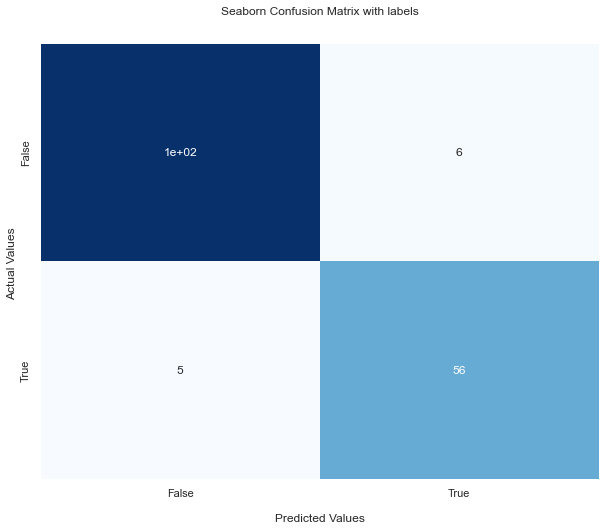

In [22]:
cf_matrix = confusion_matrix(y_test, predictions)
# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

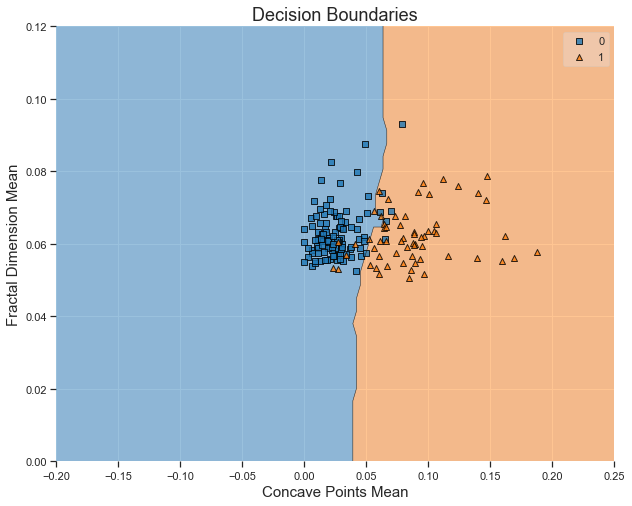

In [23]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = KNN_model)
plt.xlabel('Concave Points Mean', fontsize = 15)
plt.ylabel('Fractal Dimension Mean', fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.xlim(-0.2, 0.25)
plt.ylim(0, 0.12)
plt.show()